Madeline Birch // April 13, 2023 // DSC- Flex (Mark Barbour)

# ***PHASE 2 PROJECT***

![Long and Foster](Long_and_Foster.png)

# 1. BUSINESS UNDERSTANDING

Real estate company Long and Foster is interested in developing a predictive model that can estimate the sale price of a house in King Count, Washington. By analyzing various factors such as the number of bedrooms, bathrooms, square footage of the house, location, and other important features, L&F aim to provide more accurate home sale price estimates to their clients and improve their business efficiency. 

The modeling process will also help Long and Foster identify potential investment opportunities in the county by analyzing which features have the most significant impact on the sale price of a house. By using the results of the analysis, the company can make better decisions regarding their investments in the county. 

The objective of this project is to create a multiple linear regression model that can predict the sale price of a house based on predictive factors and provide insights that can help Long and Foster improve their business operations.

# 2. DATA UNDERSTANDING

### A. Why multiple linear regression?

Instead of a basic, exploratory data analysis, we are using statistical analyses, such as regression coefficients and R-squared values. Such statistics allow us to identify and tactically measure the relationships between different variables in our data. Basic data analysis (i.e. creating graphs and charts) help us visualize our data and identify patterns, but it does not provide us with a formal measure of the strength of the relationships or the predictive power of the variables.

Regression analysis estimate the coefficients of each variable and their statistical significance, which helps us to understand the relative importance of each variable in predicting the target (price).

In addition, regression analysis allows us to control for the effects of other variables in the model and assess their impact on the dependent variable. This allows us to isolate the effect of each independent variable on the dependent variable and identify potential investment opportunities based on the variables that have the most significant impact on house prices.

### B. The Dataset

For this project, we are using 'kc_house_data.csv', a public, tabular dataset lifted from from King County, WA's website (kingcounty.gov). 

Our target variable is 'price', which records final sale price of King County homes. Columns serve as features (predictors) in this dataset. The dataset has been updated to include homes sold up until the year 2022. 

Numeric predictors are:
'id' (recordor observation number), 'date' (date sold), 'bedrooms' (no. bedrooms), 'bathrooms' (no. bathrooms), 'sqft_above'(square footage of home apart from basement), 'sqft_living'(square footage of living space in the home),'sqft_lot'(square footage of lot), 'sqft_garage'(square footage of garage), 'sqft_patio(square footage of outdoor patio),'floors'(number of floors, including levels, in the home), 'yr_built'(year home was built), 'yr_renovated'(if and when home was renovated), 'lat'(latitude coordinate), and 'long'(longitude coordinate).

Categorical predictors are:
'waterfront'(whether or not home is on a waterfront, eg. Puget Sound, Lake Washington, etc.), 'greenbelt'(whether or not home is near or adjacent to a green belt or natural land),'nuisance'(whether or not the home is near an airport, heavy traffic, or other notable nuisances), 'view'(quality of both nature and city views from the home), 'condition'(overall codified condition of the house as defined by (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r), 'grade'(overall grade of the house pertaining to construction and design), 'heat_source'(heat source type), and 'sewer_system'(sewer system type).

# 3. DATA PREPARATION

We will begin by performing a surface level inspection of the dataset to get a better understanding of it. 

## A. Data inspection

We begin our data preparation by inspecting the data and getting a holistic sense of the dataframe and its various descriptive statistics.

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Reading dataset as a pandas DataFrame
data = pd.read_csv('data/kc_house_data.csv')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Inspecting the head of the dataframe
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880
5,2807100156,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,...,PUBLIC,1190,0,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155
6,5122400111,11/17/2021,1317227.0,3,3.0,2080,27574,1.0,NO,NO,...,PRIVATE,2080,0,0,150,1951,0,"2633 Southwest 164th Place, Burien, Washington...",47.455470,-122.367220
7,7137850210,4/28/2022,820000.0,3,2.5,2214,3506,2.0,NO,NO,...,PUBLIC,2214,0,440,206,2019,0,"24913 122nd Place Southeast, Kent, Washington ...",47.378355,-122.178625
8,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
9,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305


In [3]:
# Getting shape of the dataframe to understand no. of observations
data.shape

(30155, 25)

In [4]:
# Inspecting full list of columns 
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
# Getting statistics of the model
data.describe

<bound method NDFrame.describe of                id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors water

## B. Data cleaning: handling missing values

We continue our data preparation phase by checking for and dropping missing values, as well as dropping any features we might not want to use in modeling.

In [6]:
# Checking for null values 
data.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [7]:
data = data.drop(['heat_source', 'sewer_system'], axis=1)

In [8]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
dtype: object

In [9]:
data = data.drop(['address', 'view'], axis=1)

## C. Handling categorical data

There are several features in the dataset that contain categorical data that we might want to use in modeling: 'waterfront', 'nuisance', 'greenbelt', 'condition', 'grade'. Let's encode them into binary features so that our future model(s) will be able to account for the data.

In [10]:
# One-hot encoding categorical data
data = pd.get_dummies(data, columns=['waterfront', 'nuisance', 'greenbelt', 'condition', 'grade'], drop_first=True)
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'lat', 'long',
       'waterfront_YES', 'nuisance_YES', 'greenbelt_YES', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better'],
      dtype='object')

## D. Feature engineering & more data cleaning

Here, we exercise a bit of creativity and innovation by engineering a new feature 'season' which extracts the month from sale 'date' object, and grouping months into the four seasons: winter, spring, summer and fall.

In [11]:
import datetime as dt

# Convert 'yr_built' to datetime format
data['yr_built'] = pd.to_datetime(data['yr_built'], format='%Y')

# Calculate age feature
current_year = dt.datetime.now().year
data['house_age'] = current_year - data['yr_built'].dt.year

# Drop 'yr_built' column
data = data.drop('yr_built', axis=1)

# Print first 5 rows of transformed data
data['house_age'].head()

0    54
1    73
2    67
3    13
4    11
Name: house_age, dtype: int64

In [12]:
# Convert the 'date' column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Create separate columns for 'month', 'year', and 'day'
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day

# Create binary features for seasons using 'month' column
data['season_winter'] = data['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)
data['season_spring'] = data['month'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
data['season_summer'] = data['month'].apply(lambda x: 1 if x in [6, 7, 8] else 0)
data['season_fall'] = data['month'].apply(lambda x: 1 if x in [9, 10, 11] else 0)

data = data.drop(['month', 'year', 'day', 'date'], axis=1)

In [13]:
# Converting all integers to floats
data = data.astype('float64')

## E. First feature selection

Selecting our first feature for a baseline, simple regression model will involve creating a correlation matrix with all features with respect to target 'price' and selecting the feature with the strongest correlation.

In [14]:
# creating a correlation matrix of all features with respect to 'price' 
corr_with_price = data.corr()['price'].sort_values(ascending=False)
print(corr_with_price)

price                  1.000000
sqft_living            0.608521
sqft_above             0.538651
bathrooms              0.480401
grade_11 Excellent     0.317190
sqft_patio             0.313409
grade_10 Very Good     0.300315
bedrooms               0.289204
grade_12 Luxury        0.282957
sqft_garage            0.264169
sqft_basement          0.245058
waterfront_YES         0.232250
grade_9 Better         0.202575
grade_13 Mansion       0.198060
floors                 0.180576
sqft_lot               0.085730
yr_renovated           0.084786
season_spring          0.084385
greenbelt_YES          0.068256
lat                    0.063632
nuisance_YES           0.011547
condition_Very Good    0.008617
grade_2 Substandard   -0.007323
season_winter         -0.014672
grade_3 Poor          -0.014922
grade_8 Good          -0.018796
grade_4 Low           -0.021569
long                  -0.022509
condition_Poor        -0.023865
season_summer         -0.026724
condition_Fair        -0.032139
id      

Looking at the above correlation matrix, we see that the feature with the strongest correlation to target 'price' is 'sqft_living'. We will build our first model as a simple regression model using only this variable.

In Multiple Linear Regression, we are working with this mathematical formula:

y=β1x1+β2x2+...

To begin the iterative modeling process, however, we begin with the simple regression formula:

y =𝛽0+𝛽1(𝑥)

Where:
- y = 'price' (target, endogenous variable)
- x = 'sqft_living' (single predictor, exogenous variable)
- 𝛽0 = y-intercept
- 𝛽1 =  slope (regression coefficient)

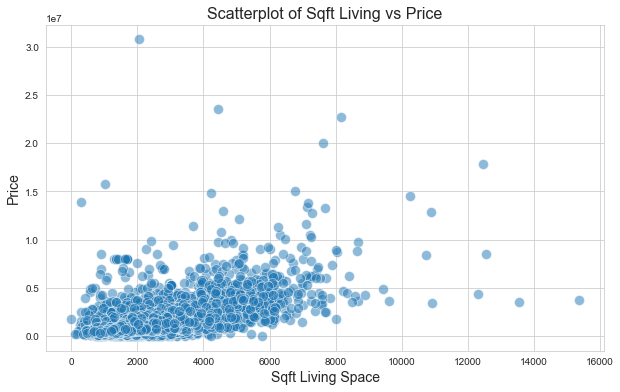

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.scatterplot(data=data, x='sqft_living', y='price', alpha=0.5, s=100)
plt.xlabel('Sqft Living Space', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Scatterplot of Sqft Living vs Price', fontsize=16)
plt.show()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='sqft_living', ylabel='Density'>

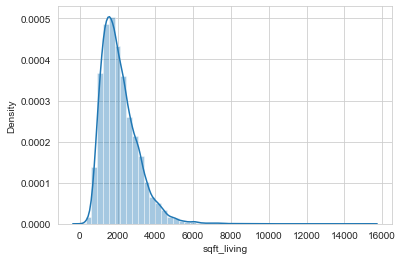

In [16]:
# Plotting distribution of predictor
sns.distplot(data['sqft_living'], kde=True)


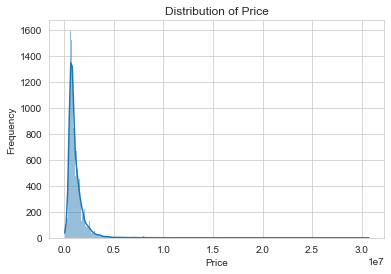

In [17]:
# Plot histogram with distribution curve for 'sqft_living'
sns.histplot(data=data, x='price', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

We see from the plots above that there is some positive linearity to the relationship between the target and predictor, and that the raw predictor data and the raw target data is pretty skewed. We will investigate this relationship further in our baseline model.

# 4. MODELING

## A. Baseline model

In [18]:
# Defining x and y variables
y = data['price']
X_baseline = data['sqft_living']

# Creating the baseline model
baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X_baseline))
baseline_model

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [19]:
# Fitting the model
baseline_results = baseline_model.fit()
baseline_results

In [20]:
print('Model f-statistic:', baseline_results.fvalue)
print('Model p-value:', baseline_results.f_pvalue)
print('R-squared:', baseline_results.rsquared)
print( 'Regression coefficients:', baseline_results.params)

Model f-statistic: 17731.562179183904
Model p-value: 0.0
R-squared: 0.3702980955079519
Regression coefficients: const         -74432.624330
sqft_living      560.005022
dtype: float64


### i. Baseline model interpretations

**Model p-value:** This is a measure of the statistical significance of the f-statistic. It tells us the probability of obtaining an f-statistic as extreme or more extreme than the observed one, assuming the null hypothesis that all the regression coefficients are zero. A small p-value (less than the significance level, often set to 0.05) indicates that the model is statistically significant and that at least one of the regression coefficients is non-zero. In this case, the p-value is 0.0, which is smaller than 0.05 and indicates that the model is highly statistically significant.

**R-squared:** This is a measure of how well the independent variable(s) explain the variability in the dependent variable. R-squared values range from 0 to 1, with higher values indicating a better fit. In this case, the R-squared value is 0.3703, which means that the independent variable (sqft_living) explains about 37.03% of the variability in the dependent variable (price).

**Regression coefficients:** These are estimates of the effect of the independent variable(s) on the dependent variable. In this case, there are two coefficients: the intercept (const) and the coefficient for sqft_living. The intercept is estimated to be -74432.62, which means that the predicted price when sqft_living is 0 is -74432.62. The coefficient for sqft_living is 560.01, which means that for every one unit increase in sqft_living, the predicted price increases by 560.01.

### ii. Baseline Model Visualization

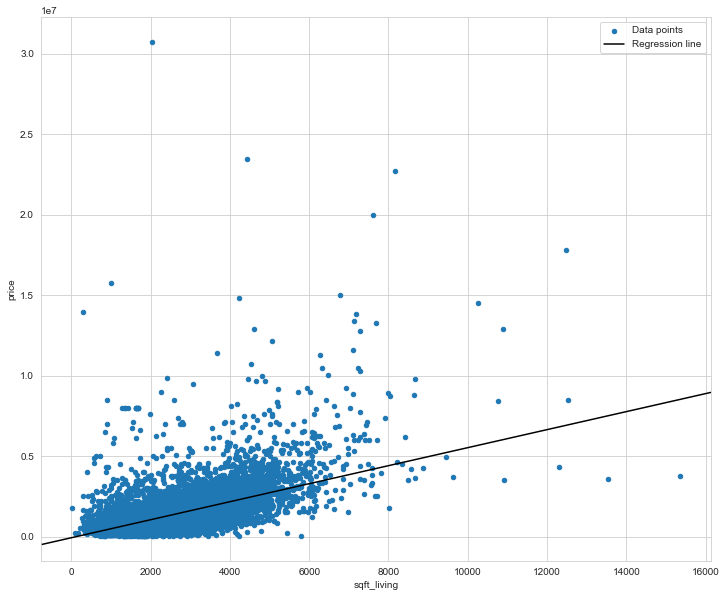

In [21]:
fig, ax = plt.subplots(figsize=(12,10))
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend()
plt.show()


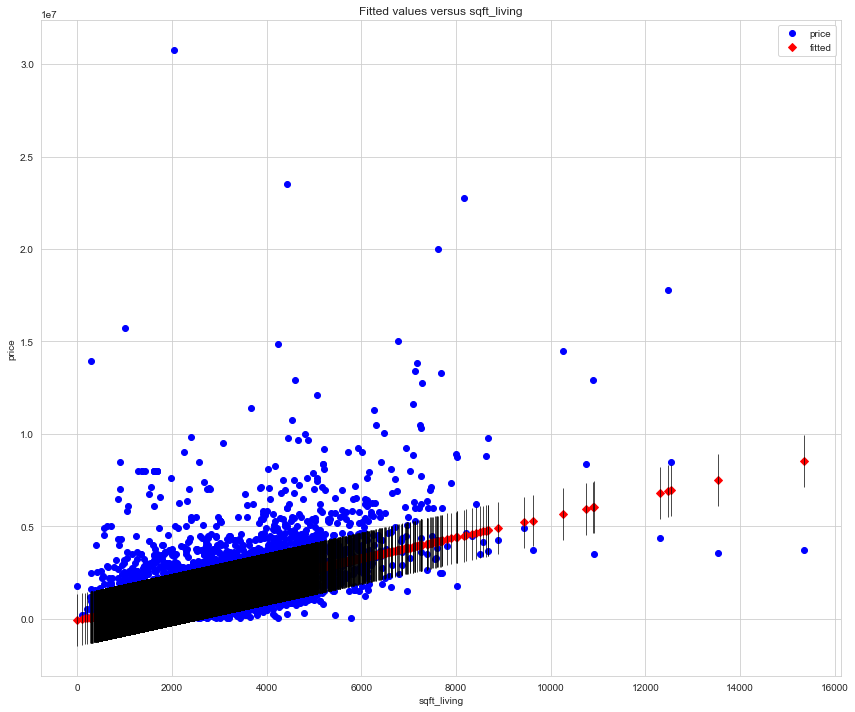

In [22]:
fig = plt.figure(figsize=(12, 10)) # Set the size of the figure
ax = fig.add_subplot(111)
sm.graphics.plot_fit(baseline_results, "sqft_living", ax=ax)
fig.tight_layout() # Adjust the spacing between subplots
plt.show()


The above plots show that most of the actual data points stray pretty far from the fitted, predicted data points along the y-intercept. This might indicate that the predictor, the target, or both, might need to be transformed in some way, but we will stick with the raw data for now for comparison.

### a. Baseline residual visualization

Model residuals show the differences between the true values and the values predicted by the model. We can get them easily from the model results using the resid attribute. 

A QQ plot is a graphical technique that compares the distribution of a set of data to a known distribution, such as the normal distribution. If the data is normally distributed, the QQ plot should show a straight line. However, if the data is not normally distributed, the QQ plot will show deviations from a straight line.

In [23]:
# Getting baseline model residual values
baseline_results.resid

0        8.862670e+04
1       -5.567813e+05
2       -1.227382e+06
3       -3.601782e+05
4        3.972700e+04
             ...     
30150    5.598230e+05
30151    2.562225e+05
30152   -3.277551e+04
30153   -5.897803e+05
30154   -9.757340e+04
Length: 30155, dtype: float64

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


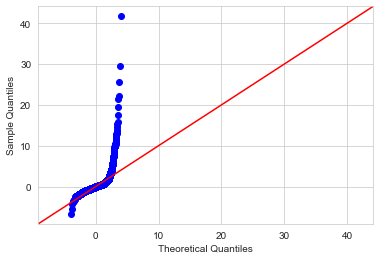

In [24]:
from scipy import stats

# Creating qq plot to visualize residuals
sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True)
plt.show()

The qq plot above shows that a large portion of the true data points in 'sqft_living' stray far from normal distribution. This means that the model is underestimating the price for many of the higher values of 'sqft_living'. 

To address this issue in future iterations, a transformation to make the data more normally distributed, such as taking the natural logarithm or square root of 'sqft_living'. This can help to reduce the skewness in the data and improve the accuracy of the model. You may also want to consider using a different type of regression model that can handle non-normal data, such as a generalized linear model.

## B. Simple regression model iterations

### i. Iteration 1: log transformation of 'price'

As we iterate through the modeling process, let's continue to analyze the distributions of features, including the target. Notably, we saw the distribution of 'price' was extremely right-skewed, indicating uneven distribution and several outliers from the mean. We might try performing a log transformation of 'price' to see if the distribution moves more towards normal.

In [25]:
# Creating new feature 'price_log'
data['price_log'] = np.log(data['price'])

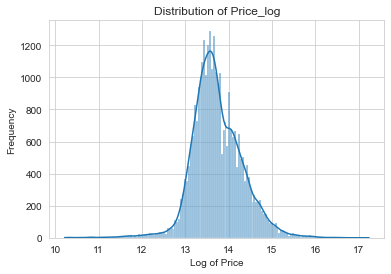

In [26]:
# Plotting histogram with distribution curve for 'sqft_living'
sns.histplot(data=data, x='price_log', kde=True)
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price_log')
plt.show()

Much better. Let's see if our previous model's statistics can be improved using this new target feature.

In [27]:
# Defining x and y variables
y = data['price_log']
X_second = data['sqft_living']

# Creating  second model
second_model = sm.OLS(endog=y, exog=sm.add_constant(X_second))

# Fitting the model
second_results = second_model.fit()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [28]:
print('Model f-statistic:', second_results.fvalue)
print('Model p-value:', second_results.f_pvalue)
print('R-squared:', second_results.rsquared)
print( 'Regression coefficients:', second_results.params)

Model f-statistic: 18984.677271326836
Model p-value: 0.0
R-squared: 0.3863568309608503
Regression coefficients: const          12.949056
sqft_living     0.000372
dtype: float64


The R-squared value of 0.3863568309608503 indicates that about 39% of the variance in the log-transformed target variable can be explained by the predictor variable 'sqft_living', which is a small improvement from our last R-squared value of 37%. The regression coefficient for 'sqft_living' is 0.000372, indicating that for every one unit increase in 'sqft_living', the log-transformed 'price_log' increases by 0.000372.

### ii. Iteration 2: square root transformation of 'sqft_living'

Recall also that the linear relationship between 'sqft_living' and 'price' wasn't all that linear at all. Let's see if performing a square root transformation of the predictor has any effect on the baseline simple regression model. 

In [29]:
# Creating square root transformed feature
data['sqft_living_sqrt'] = np.sqrt(data['sqft_living'])


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='sqft_living_sqrt', ylabel='Density'>

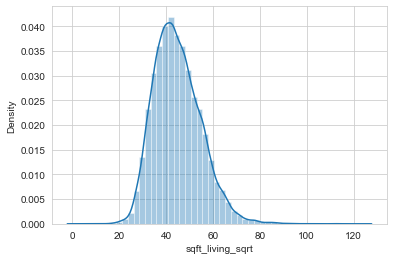

In [30]:
# Plotting distribution of transformed predictor
sns.distplot(data['sqft_living_sqrt'], kde=True)


As we can see, using the square root transformed version of our predictor has normalized its distribution a bit. Let's see if we can see any improvements in our simple regression model using 'sqft_living_sqrt' as our predictor and 'price_log' as our target.

In [31]:
# Defining new x variable
X_third = data['sqft_living_sqrt']

# Creating  second model
third_model = sm.OLS(endog=y, exog=sm.add_constant(X_third))

# Fitting the model
third_results = third_model.fit()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [32]:
print('Model f-statistic:', third_results.fvalue)
print('Model p-value:', third_results.f_pvalue)
print('R-squared:', third_results.rsquared)
print( 'Regression coefficients:', third_results.params)

Model f-statistic: 18420.96140036788
Model p-value: 0.0
R-squared: 0.37923531186872406
Regression coefficients: const               12.122370
sqft_living_sqrt     0.035941
dtype: float64


It doesn't look like much has changed significantly in the way of r-sq values or regression coefficients. Let's just proceed on with more feature selection and incorporation of 1 (or more!) categorical variable. The purpose of transforming this feature was to illustrate how feature transformation can impact the normality of the distribution of the data, but it's clear that it wasn't that necessary. However, we can keep it, along with the log-transformed price target, and iterate on.

In [33]:
# Making a copy of original dataframe and storing it as 'df'
df = data.copy()

# Dropping 'price' and 'sqft_living' from df
df = df.drop(['price', 'sqft_living'], axis=1)

## C. First multiple linear regression model

We will now iterate beyond our simple linear regression and choose another feature to add to our model for our first attempt at multiple linear regression. Using industry knowledge as well as our correlation matrix, can we assume that a feature like 'bathrooms' or 'house_age' would be a promising indicator of house price? Let's find out! First, let's visualize our second feature. We'll go with 'house_age', as it is pretty (negatively) correlated to 'price' and it contains more continuous data than the discrete data found in 'bathrooms'. 

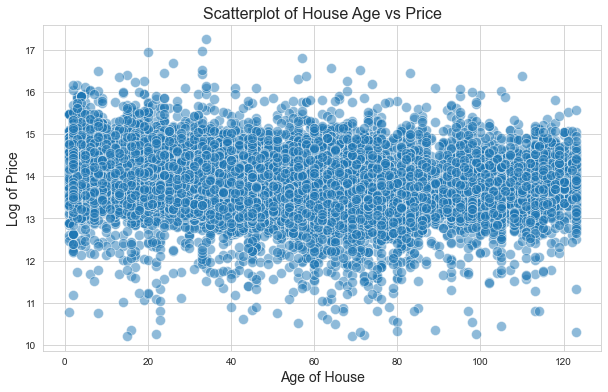

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='house_age', y='price_log', alpha=0.5, s=100)
plt.xlabel('Age of House', fontsize=14)
plt.ylabel('Log of Price', fontsize=14)
plt.title('Scatterplot of House Age vs Price', fontsize=16)
plt.show()

### i. First multiple linear regression model

In [41]:
# Defining new x and y variables
y = df['price_log']
X_fourth = df[['sqft_living_sqrt', 'house_age']]

# Creating  second model
fourth_model = sm.OLS(endog=y, exog=sm.add_constant(X_fourth))

# Fitting the model
fourth_results = fourth_model.fit()

print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     9408.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:56:23   Log-Likelihood:                -19200.
No. Observations:               30155   AIC:                         3.841e+04
Df Residuals:                   30152   BIC:                         3.843e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.9983      0.014  

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


This model summary shows that our R-squared value has improved only slightly at 0.384, which indicates that the model explains about 38.4% of the variance in 'price_log'. We also see that the coefficient for 'sqft_living_sqrt' has pretty much stayed the same, holding 'house_age' constant. 

This isn't terrible for a first multiple linear regression; however, we will want to select better variables for future iterations. Let's plot the model in 3D anyway, for illustration's sake. We will plot 3 different 3D perspectives of our model.

### ii. 3D model visualization

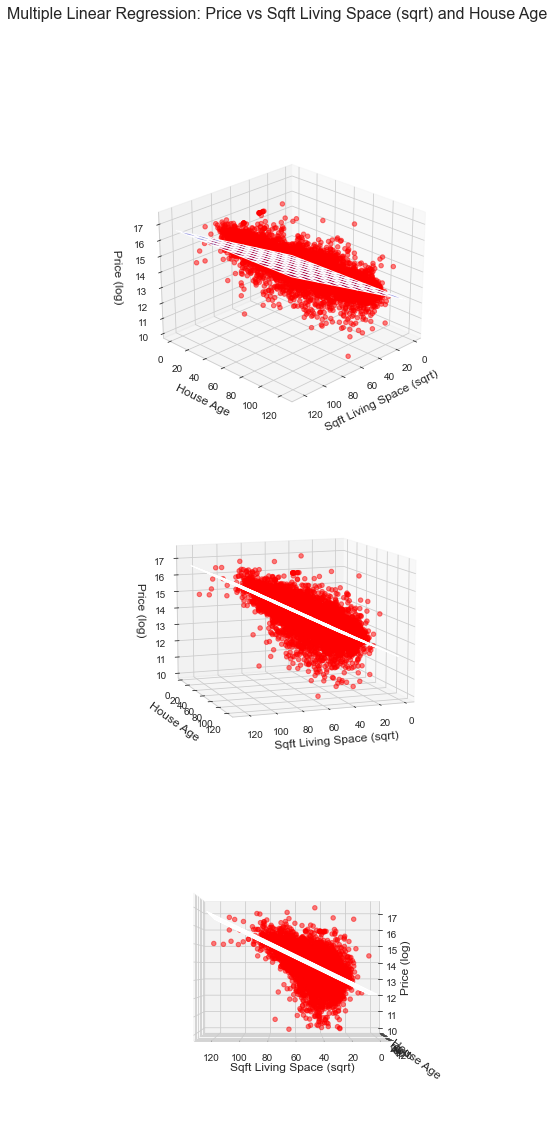

In [46]:
fig = plt.figure(figsize=(12, 18))

# Creating the first subplot
ax1 = fig.add_subplot(3, 1, 1, projection='3d')
ax1.scatter(df['sqft_living_sqrt'], df['house_age'], df['price_log'], c='red', marker='o', alpha=0.5)
ax1.plot_surface(xx, yy, fittedY, color='blue', alpha=0.3)
ax1.set_xlabel('Sqft Living Space (sqrt)', fontsize=12)
ax1.set_ylabel('House Age', fontsize=12)
ax1.set_zlabel('Price (log)', fontsize=12)
ax1.view_init(elev=25, azim=45) # change the view angle

# Creating the second subplot
ax2 = fig.add_subplot(3, 1, 2, projection='3d')
ax2.scatter(df['sqft_living_sqrt'], df['house_age'], df['price_log'], c='red', marker='o', alpha=0.5)
ax2.plot_surface(xx, yy, fittedY, color='blue', alpha=0.3)
ax2.set_xlabel('Sqft Living Space (sqrt)', fontsize=12)
ax2.set_ylabel('House Age', fontsize=12)
ax2.set_zlabel('Price (log)', fontsize=12)
ax2.view_init(elev=10, azim=70) # Changing the view angle

# Creating the third subplot
ax3 = fig.add_subplot(3, 1, 3, projection='3d')
ax3.scatter(df['sqft_living_sqrt'], df['house_age'], df['price_log'], c='red', marker='o', alpha=0.5)
ax3.plot_surface(xx, yy, fittedY, color='blue', alpha=0.3)
ax3.set_xlabel('Sqft Living Space (sqrt)', fontsize=12)
ax3.set_ylabel('House Age', fontsize=12)
ax3.set_zlabel('Price (log)', fontsize=12)
ax3.view_init(elev=0, azim=90) # Changing the view angle

# Setting plot title
fig.suptitle('Multiple Linear Regression: Price vs Sqft Living Space (sqrt) and House Age', fontsize=16)

plt.show()


Now, to plot the residuals of the model to get a better understanding of its linearity:

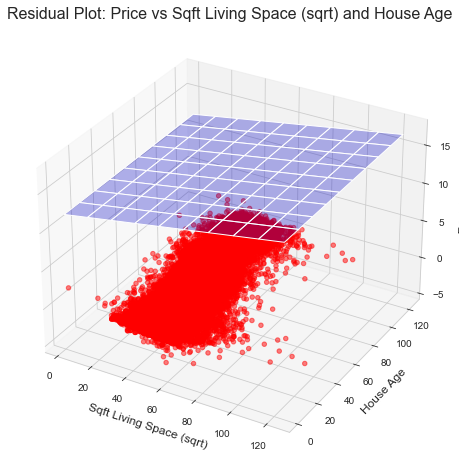

In [47]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# plot the residuals
X = df[['sqft_living_sqrt', 'house_age']]
Y = df['price_log']
model = LinearRegression().fit(X, Y)
residuals = Y - model.predict(X)
ax.scatter(df['sqft_living_sqrt'], df['house_age'], residuals, c='red', marker='o', alpha=0.5)

# plot the regression plane
xx, yy = np.meshgrid(np.linspace(X['sqft_living_sqrt'].min(), X['sqft_living_sqrt'].max(), 10), 
                     np.linspace(X['house_age'].min(), X['house_age'].max(), 10))
fittedY = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax.plot_surface(xx, yy, fittedY, color='blue', alpha=0.3)

# set axis labels
ax.set_xlabel('Sqft Living Space (sqrt)', fontsize=12)
ax.set_ylabel('House Age', fontsize=12)
ax.set_zlabel('Residuals', fontsize=12)

# set plot title
ax.set_title('Residual Plot: Price vs Sqft Living Space (sqrt) and House Age', fontsize=16)

plt.show()


A well-specified linear regression model should have residuals that are randomly distributed around zero with no pattern, indicating that the model is capturing all the relevant information in the data. However, if the residuals are systematically above or below the regression plane, it indicates that the model is missing some important factors or variables that are related to the response variable. Here we see the residuals hanging well below the plane...

One explanation for this pattern is that there may be much of a non-linear relationship between the predictors and the response variable. Either way, we need more variables in our model. Let's move on to further feature selection.

### iii. 

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Performing recursive feature elimination to select best features 
X = df.drop('price_log', axis=1) 
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)
rfe.fit(X, df['price_log'])

# print the rankings of each feature
print("Feature ranking:", rfe.ranking_)

# select the best 4 features
best_feature_indices = rfe.ranking_.argsort()[:4]
best_feature_names = list(X.columns[best_feature_indices])
print("Best features:", best_feature_names)


Feature ranking: [34 18 13 33 16 29 30 28 31 32 24 26  7 17 15 22 14 10 11  3  1  1  1  1
  2  5  6  8 21  9  4 27 25 12 20 19 23]
Best features: ['grade_13 Mansion', 'grade_12 Luxury', 'grade_11 Excellent', 'grade_2 Substandard']
